In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
data= pd.read_csv('/Users/alonsosalcido/Desktop/Quantifying the World/case 6/all_train.csv')

In [4]:
data.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [5]:
len(data)

7000000

In [6]:
#Split Dataset into X and Y
x= data.iloc[:,1:]
y= data.iloc[:,:1]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data= scaler.fit_transform(x)

In [8]:
# Look at input Shape
scaled_data.shape

(7000000, 28)

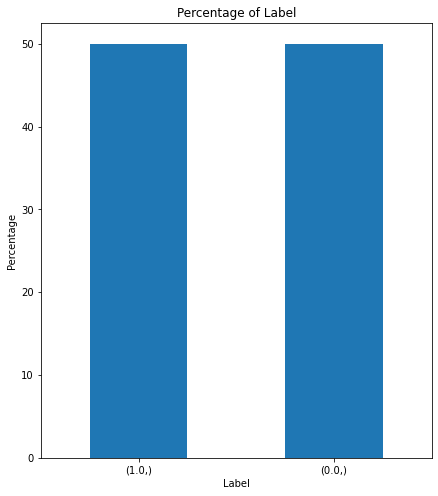

# label
1.0        50.012557
0.0        49.987443
dtype: float64


In [9]:
import matplotlib.pyplot as plt
# Compute the frequency of each color value and divide by the total count to get percentages
counts = y.value_counts(normalize=True) * 100

# Set Fig Size
fig, ax = plt.subplots(figsize=(7, 8))

# Create a bar plot of the result
ax = counts.plot(kind='bar', rot=0)

# Add labels and a title to the plot
ax.set_xlabel('Label')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Label')


# Display the plot
plt.show()
print(counts)

## Reduce dataset to test parameters

In [10]:
from sklearn.model_selection import train_test_split

reduced_x, large_x = train_test_split(scaled_data, test_size=0.7, random_state=42)
reduced_y, large_y = train_test_split(y, test_size=0.7, random_state=42)

In [10]:
#Save Reduced Dataset
import pickle

# Save the DataFrame to a file
with open('reduced_x.pickle', 'wb') as f:
    pickle.dump(reduced_x, f)
with open('reduced_y.pickle', 'wb') as f:
    pickle.dump(reduced_y, f)

In [1]:
import pickle
# Load the saved DataFrame from the file
with open('reduced_x.pickle', 'rb') as f:
    reduced_x = pickle.load(f)
# Load the saved DataFrame from the file
with open('reduced_y.pickle', 'rb') as f:
    reduced_y = pickle.load(f)

In [44]:
#Split Reduced Dataset 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reduced_x, reduced_y, test_size=0.8, random_state=42)

In [13]:
# Sequential Models Knows in what order to connect layers sequentially
model= tf.keras.Sequential()

model.add(tf.keras.Input(shape=(28,)))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='sgd', loss='BinaryCrossentropy', metrics=['accuracy'])

In [19]:
#Use train data to fit
model.fit(reduced_x, reduced_y, epochs=2, batch_size=10)

Epoch 1/2
140000/140000 [==============================] - 191s 1ms/step - loss: 0.2828 - accuracy: 0.8699
Epoch 2/2
140000/140000 [==============================] - 167s 1ms/step - loss: 0.2815 - accuracy: 0.8705


In [24]:
# Create New Layers
model.add(tf.keras.Input(shape=(28,)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [25]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [26]:
#Use train data to fit
model.fit(reduced_x, reduced_y, epochs=2, batch_size=10)

Epoch 1/2
140000/140000 [==============================] - 219s 2ms/step - loss: 0.2906 - accuracy: 0.8665
Epoch 2/2
140000/140000 [==============================] - 198s 1ms/step - loss: 0.2807 - accuracy: 0.8721


In [27]:
# New Layers
model.add(tf.keras.Input(shape=(28,)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
#Use train data to fit
model.fit(reduced_x, reduced_y, epochs=2, batch_size=15)

Epoch 1/2
93334/93334 [==============================] - 165s 2ms/step - loss: 0.2784 - accuracy: 0.8737
Epoch 2/2
93334/93334 [==============================] - 160s 2ms/step - loss: 0.2750 - accuracy: 0.8756


In [11]:
from tensorflow.keras.callbacks import TensorBoard
from time import time

tb = TensorBoard(log_dir=f"logs\\{time()}")

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
safety = EarlyStopping(monitor='val_loss', patience=1)

In [22]:
# Add an Extra Layer
model= tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
#Fit Model and Apply Early Stopping
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=15, callbacks=[tb, safety])

Epoch 1/100
28000/28000 [==============================] - 177s 6ms/step - loss: 0.3325 - accuracy: 0.8425 - val_loss: 0.3026 - val_accuracy: 0.8567
Epoch 2/100
28000/28000 [==============================] - 166s 6ms/step - loss: 0.3042 - accuracy: 0.8578 - val_loss: 0.2951 - val_accuracy: 0.8629
Epoch 3/100
28000/28000 [==============================] - 168s 6ms/step - loss: 0.2970 - accuracy: 0.8622 - val_loss: 0.2954 - val_accuracy: 0.8636


In [9]:
# Define Model
model= tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(40, activation='relu'))
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
#Fit Model and Apply Early Stopping
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=15, callbacks=[tb, safety])

Epoch 1/100
28000/28000 [==============================] - 146s 5ms/step - loss: 0.3084 - accuracy: 0.8559 - val_loss: 0.2918 - val_accuracy: 0.8650
Epoch 2/100
28000/28000 [==============================] - 142s 5ms/step - loss: 0.2909 - accuracy: 0.8662 - val_loss: 0.2878 - val_accuracy: 0.8689
Epoch 3/100
28000/28000 [==============================] - 165s 6ms/step - loss: 0.2860 - accuracy: 0.8697 - val_loss: 0.2818 - val_accuracy: 0.8709
Epoch 4/100
28000/28000 [==============================] - 144s 5ms/step - loss: 0.2833 - accuracy: 0.8712 - val_loss: 0.2820 - val_accuracy: 0.8715


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

In [19]:
# Add an Extra Layer
model.add(tf.keras.Input(shape=(28,)))
model.add(tf.keras.layers.Dense(30, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(60, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Define Early Stopping Parameters
safety = EarlyStopping(monitor='val_loss', patience=2)

In [22]:
#Fit Model and Apply Early Stopping
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), batch_size=15, callbacks=[tb, safety])

Epoch 1/1000
28000/28000 [==============================] - 186s 7ms/step - loss: 0.2953 - accuracy: 0.8701 - val_loss: 0.2902 - val_accuracy: 0.8717
Epoch 2/1000
28000/28000 [==============================] - 181s 6ms/step - loss: 0.2928 - accuracy: 0.8707 - val_loss: 0.2915 - val_accuracy: 0.8712
Epoch 3/1000
28000/28000 [==============================] - 188s 7ms/step - loss: 0.2908 - accuracy: 0.8720 - val_loss: 0.2855 - val_accuracy: 0.8735
Epoch 4/1000
28000/28000 [==============================] - 179s 6ms/step - loss: 0.2895 - accuracy: 0.8726 - val_loss: 0.2853 - val_accuracy: 0.8744
Epoch 5/1000
28000/28000 [==============================] - 176s 6ms/step - loss: 0.2883 - accuracy: 0.8731 - val_loss: 0.2885 - val_accuracy: 0.8723
Epoch 6/1000
28000/28000 [==============================] - 172s 6ms/step - loss: 0.2884 - accuracy: 0.8728 - val_loss: 0.2843 - val_accuracy: 0.8753
Epoch 7/1000
28000/28000 [==============================] - 193s 7ms/step - loss: 0.2878 - accuracy:

In [23]:
# Define Model Layers
model.add(tf.keras.Input(shape=(28,)))
model.add(tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(80, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
#Fit Model and Apply Early Stopping
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), batch_size=15, callbacks=[tb, safety])

Epoch 1/1000
28000/28000 [==============================] - 199s 7ms/step - loss: 0.4536 - accuracy: 0.8719 - val_loss: 0.3894 - val_accuracy: 0.8673
Epoch 2/1000
28000/28000 [==============================] - 177s 6ms/step - loss: 0.3447 - accuracy: 0.8736 - val_loss: 0.3169 - val_accuracy: 0.8765
Epoch 3/1000
28000/28000 [==============================] - 179s 6ms/step - loss: 0.3110 - accuracy: 0.8736 - val_loss: 0.3011 - val_accuracy: 0.8758
Epoch 4/1000
28000/28000 [==============================] - 176s 6ms/step - loss: 0.2993 - accuracy: 0.8742 - val_loss: 0.2940 - val_accuracy: 0.8761
Epoch 5/1000
28000/28000 [==============================] - 191s 7ms/step - loss: 0.2955 - accuracy: 0.8739 - val_loss: 0.2905 - val_accuracy: 0.8763
Epoch 6/1000
28000/28000 [==============================] - 176s 6ms/step - loss: 0.2940 - accuracy: 0.8740 - val_loss: 0.2880 - val_accuracy: 0.8766
Epoch 7/1000
28000/28000 [==============================] - 184s 7ms/step - loss: 0.2930 - accuracy:

# Fit Model On 80/20 Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.8, random_state=42)

In [11]:
X_train.shape

(1400000, 28)

In [12]:
X_test.shape

(5600000, 28)

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import TensorBoard
from time import time

tb = TensorBoard(log_dir=f"logs\\{time()}")

In [14]:
# Define Model Layers
model= tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(80, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Define Early Stopping Parameters

from tensorflow.keras.callbacks import EarlyStopping
safety = EarlyStopping(monitor='val_loss', patience=1)

In [16]:
#Fit Model and Apply Early Stopping
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), batch_size=15, callbacks=[tb, safety])

Epoch 1/1000
93334/93334 [==============================] - 554s 6ms/step - loss: 0.5035 - accuracy: 0.8570 - val_loss: 0.3287 - val_accuracy: 0.8661
Epoch 2/1000
93334/93334 [==============================] - 556s 6ms/step - loss: 0.3195 - accuracy: 0.8646 - val_loss: 0.3130 - val_accuracy: 0.8669
Epoch 3/1000
93334/93334 [==============================] - 625s 7ms/step - loss: 0.3131 - accuracy: 0.8660 - val_loss: 0.3074 - val_accuracy: 0.8690
Epoch 4/1000
93334/93334 [==============================] - 552s 6ms/step - loss: 0.3121 - accuracy: 0.8663 - val_loss: 0.3086 - val_accuracy: 0.8686
